# Smoking is bad

In [ ]:
# TODO: install all the necessary packages
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# TODO: load the data using the pathlib library to create the path to your data
path = Path().parent / "data" / "smoking_data.csv"
print(path)
df = pd.read_csv(path)

data/smoking_data.csv


In [11]:
df.head()

,Unnamed: 0,outcome,smoker,age,gender,salary
0,0,Alive,Yes,23,female,7286.0
1,1,Alive,Yes,18,male,NaN
2,2,Dead,Yes,71,male,NaN
3,3,Alive,No,67,male,NaN
4,4,Alive,No,64,female,20123.0


In [8]:
# TODO: what are the dimensions of the data frame?
df.shape

(1314, 6)

In [ ]:
# TODO: use .describe() on your data frame: what do you notice about the string columns?
df.describe()
print("The string columns are not included in the describe function because they aren't numerical numbers to compute statistical measures like mean on")

,Unnamed: 0,age,salary
count,1314.000000,1314.000000,614.000000
mean,656.500000,46.920091,48737.265472
std,379.463437,17.432027,28575.395264
min,0.000000,18.000000,1215.000000
25%,328.250000,32.000000,24112.250000
50%,656.500000,46.000000,48692.000000
75%,984.750000,61.000000,72946.250000
max,1313.000000,84.000000,99677.000000


In [ ]:
# TODO: do not forget to check the null values
df.isnull().sum()
#Salary column has 700 entries that are null

Unnamed: 0      0
outcome         0
smoker          0
age             0
gender          0
salary        700
dtype: int64

In [13]:
# TODO: prepare your data frame so that you can work with
df = df.dropna()

In [16]:
print(df.isnull().sum())
print(df.shape)

Unnamed: 0    0
outcome       0
smoker        0
age           0
gender        0
salary        0
dtype: int64
(614, 6)


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 1313
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  614 non-null    int64   
 1   outcome     614 non-null    object  
 2   smoker      614 non-null    object  
 3   age         614 non-null    int64   
 4   gender      614 non-null    object  
 5   salary      614 non-null    float64 
 6   smokes      614 non-null    int64   
 7   alive       614 non-null    int64   
 8   age_group   614 non-null    category
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 44.0+ KB


## Smoking analysis
Let's first check what your cousin did.

In [22]:
# TODO: Reimplement the small code snippet described in the problem set instructions.
df["smokes"] = df["smoker"].apply(lambda x: 1 if x == "Yes" else 0)
df["alive"] = df["outcome"].apply(lambda x: 1 if x == "Alive" else 0)
df.groupby(["smokes"]).agg(prob=("alive", np.mean))

/var/folders/4l/356ftc5d0wsd3c6hcfb63f4m0000gn/T/ipykernel_64302/2802375706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["smokes"] = df["smoker"].apply(lambda x: 1 if x == "Yes" else 0)
/var/folders/4l/356ftc5d0wsd3c6hcfb63f4m0000gn/T/ipykernel_64302/2802375706.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["alive"] = df["outcome"].apply(lambda x: 1 if x == "Alive" else 0)
/var/folders/4l/356ftc5d0wsd3c6hcfb63f4m0000gn/T/ipykernel_64302/2802375706.py:4: FutureWarning: The provided callable

,prob
smokes,
0,0.683582
1,0.767025


You should get the same results.

# Is smoking really good?
Now it is up to you to run the analysis further and check what could be underlying your cousings results.

## Is Age a factor in smoking? How is our population data when looking at age and the smokers?

In our population, we have more smokers in the 30-50 age range, whilst non-smokers dominate 20-30 and 60-80 years old. This shows a non-uniform distribution.
In the second chart, we see from those that are dead, the smoker life expectancy is shorter than the non smoker. The graph shows the average age you would expect for smoker and non-smoker based off if they are alive or dead.
In the third chart, for the most part, those that dont smoke have a higher survival rate because they are alive rather than dead. Only 50-70 have lower survival rate.

This means that since the population data had more young smokers, they were skewing the alive stat my cousin quoted. Yes technically those that smoke have a higher probability of survival but that's because the ages of smokers are young. We see as they age, the survival rate falls to 0 at the 70-90 age.

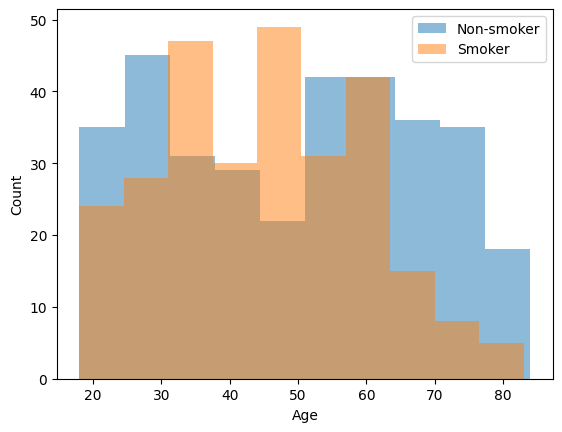

In [38]:
df.groupby("smokes")["age"].mean()
plt.hist(df[df["smokes"] == 0]["age"], bins=10, alpha=0.5, label="Non-smoker")
plt.hist(df[df["smokes"] == 1]["age"], bins=10, alpha=0.5, label="Smoker")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()


<Axes: xlabel='age', ylabel='outcome'>

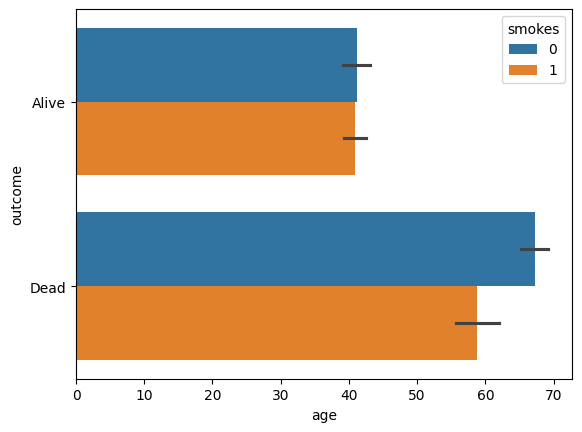

In [41]:
sns.barplot(data=df, x="age", y="outcome", hue="smokes")

In [51]:
df["age_group"] = pd.cut(df["age"], bins=[0, 30, 50, 70, 90])
grouped = df.groupby(["age_group", "smokes"])["alive"].mean()
grouped

/var/folders/4l/356ftc5d0wsd3c6hcfb63f4m0000gn/T/ipykernel_64302/621866530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age_group"] = pd.cut(df["age"], bins=[0, 30, 50, 70, 90])
/var/folders/4l/356ftc5d0wsd3c6hcfb63f4m0000gn/T/ipykernel_64302/621866530.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(["age_group", "smokes"])["alive"].mean()


age_group  smokes
(0, 30]    0         0.986301
           1         0.961538
(30, 50]   0         0.932584
           1         0.896825
(50, 70]   0         0.566667
           1         0.579545
(70, 90]   0         0.113208
           1         0.000000
Name: alive, dtype: float64

<Axes: xlabel='age_group', ylabel='alive'>

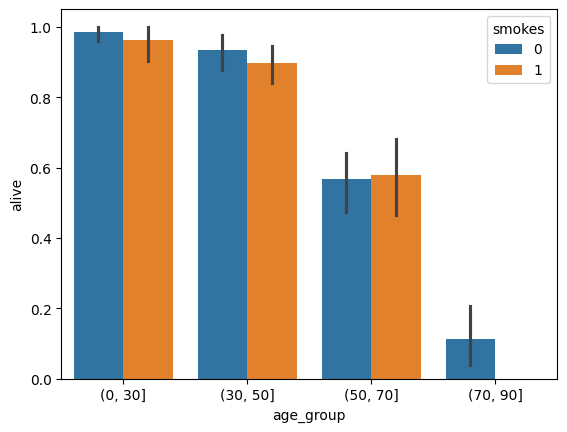

In [ ]:
sns.barplot(data=df, x="age_group", y="alive", hue="smokes")

In [39]:
df.columns

Index(['Unnamed: 0', 'outcome', 'smoker', 'age', 'gender', 'salary', 'smokes',
       'alive'],
      dtype='object')

## Is Gender a factor? Do we have a bias to more male or female participants in our population? If we see more females in the population and they don't smoke, it might back my cousins statement

/var/folders/4l/356ftc5d0wsd3c6hcfb63f4m0000gn/T/ipykernel_64302/1318088196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['male'] = df["gender"].apply(lambda x: 1 if x == "male" else 0)


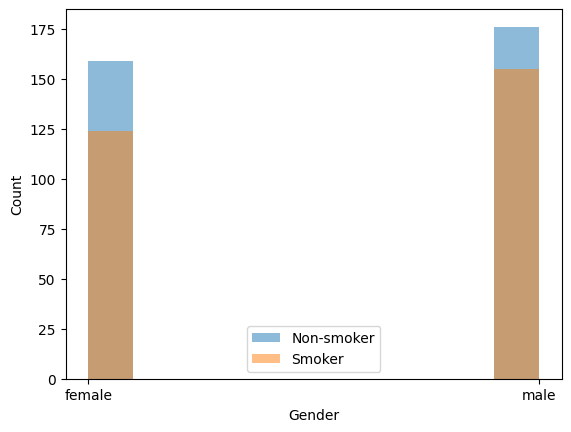

In [58]:
df['male'] = df["gender"].apply(lambda x: 1 if x == "male" else 0)
df.groupby("smokes")["male"].mean()
plt.hist(df[df["smokes"] == 0]["gender"], bins=10, alpha=0.5, label="Non-smoker")
plt.hist(df[df["smokes"] == 1]["gender"], bins=10, alpha=0.5, label="Smoker")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend()
plt.show()
